In [1]:
import pandas as pd

df=pd.read_csv('train.csv')

#df.plot.hist()
labels= df.Label
#print(labels)

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score, f1_score

import glob
import imageio
import numpy as np
import os.path as path
from datetime import datetime

# Image processing
IMAGE_PATH='train_images'

image_input_files = sorted(glob.glob(path.join(IMAGE_PATH, '*.png')))
images = [imageio.imread(im) for im in image_input_files]

Using TensorFlow backend.


In [3]:
images = np.asarray(images)
#images = images[..., None]
n_images = len(image_input_files)

print(n_images)

#images = images.reshape(,180,1500,3)
image_size = np.asarray([images.shape[0], images.shape[1], images.shape[2]])
print(image_size)
#images = np.expand_dims(images,axis=0)
#print(image_size)
images = images/256

2528
[2528  128  128]


In [4]:
# updatable plot
# a minimal example (sort of)
import matplotlib.pyplot as plt
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
        plt.plot(self.x, self.acc, label="acc")
        plt.plot(self.x, self.val_acc, label="val_acc")
        plt.legend()
        plt.show()
        EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=1, mode='auto')
plot_losses = PlotLosses()

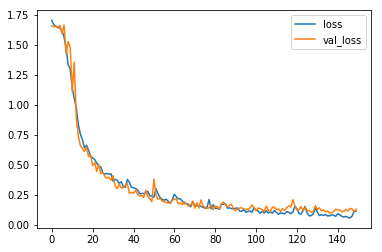

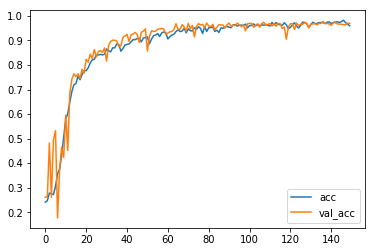

759/759 [==============================] - 6s 8ms/step
Test loss: 0.1295185346004206
Test accuracy: 0.9696969696969697


In [6]:
from sklearn.model_selection import train_test_split

num_classes = 6
img_rows = 128
img_cols = 128

#train_indices=n_images-1
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.30)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train=to_categorical(y_train, num_classes)
y_test=to_categorical(y_test, num_classes)

input_shape = (img_rows, img_cols, 1)

print(y_train)
#---------------------------------------
# CNN network processing
model = Sequential()

# 1st layer
model.add(Conv2D(filters = 64, kernel_size = (5,5), padding = 'same', input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))

#2nd layer
model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))

#3rd layer
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

BATCH_SIZE=100
EPOCHS= 150

# Train the model
history=model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1,callbacks=[plot_losses],validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



In [7]:
model.save("aoi-cnn.h5")

In [12]:
print(history)

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


759/759 [==============================] - 6s 8ms/step
Test loss: 0.1295185346004206
Test accuracy: 0.9696969696969697


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


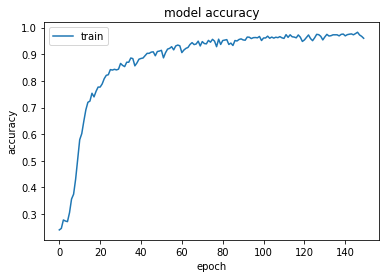

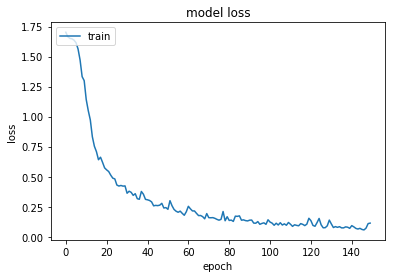

In [11]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
if __name__ == '__main__':  # it's better to add this line as suggested
    main()